# Hashtags y Menciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv("train.csv")

A continuación veremos la cantidad de hastags y menciones que hay en los datos y si guardan alguna relación con los targets.

In [3]:
df["text"] = df["text"].map(lambda x:x.split()) 

In [4]:
len(df) #Cantidad de tweets

7613

### Hashtags 

In [5]:
def contar_hashtags(x):
    contador = 0
    for i in x:
        if i[0] == '#' and len(i) > 0:
            contador += 1
    return contador

df["nro_hashtags_en_tweet"] = df["text"].map(contar_hashtags)

In [6]:
df["nro_hashtags_en_tweet"].map(lambda x: 1 if x>0 else 0).sum() #Número total de tweets con hashtags

1734

In [7]:
df["nro_hashtags_en_tweet"].sum() #Número total de hashtags

3340

In [8]:
df["nro_hashtags_en_tweet"].map(lambda x: True if x>1 else False).sum() #Cantidad de tweets con más de un hashtag

781

In [9]:
df["nro_hashtags_en_tweet"].value_counts() #Frecuencias de las distintas cantidades de hashtags por tweet

0     5879
1      953
2      398
3      203
4       83
5       38
6       26
10      10
7        8
8        7
13       4
11       2
9        2
Name: nro_hashtags_en_tweet, dtype: int64

In [10]:
df.groupby(["nro_hashtags_en_tweet", "target"]).agg("count")["id"] #Frecuencias de nro. de hashtags en tweet por target

nro_hashtags_en_tweet  target
0                      0         3465
                       1         2414
1                      0          478
                       1          475
2                      0          201
                       1          197
3                      0          108
                       1           95
4                      0           43
                       1           40
5                      0           17
                       1           21
6                      0           18
                       1            8
7                      0            4
                       1            4
8                      0            1
                       1            6
9                      0            2
10                     0            3
                       1            7
11                     0            2
13                     1            4
Name: id, dtype: int64

In [11]:
hashtags = pd.Series()
for x in df["text"]:
    for i in x:
        if i[0] == '#':
            hashtags = hashtags.append(pd.Series(i))

In [12]:
top_10_hashtags = Counter(hashtags).most_common(10)
top_10_hashtags #Top 10 hashtags con frecuencias

[('#news', 36),
 ('#News', 36),
 ('#hot', 30),
 ('#prebreak', 30),
 ('#best', 30),
 ('#???', 23),
 ('#??', 20),
 ('#Hiroshima', 20),
 ('#GBBO', 16),
 ('#terrorism', 11)]

In [13]:
cant_top_10_hashtags_por_target = []
for x in top_10_hashtags:
    cant_top_10_hashtags_por_target.append([x[0], 0, 0])

In [14]:
index = 0
for x in df["text"]:
    for i in x:
        if i in [j[0] for j in top_10_hashtags]:
            if df.loc[index]["target"] == 0:
                cant_top_10_hashtags_por_target[[j[0] for j in top_10_hashtags].index(i)][1] += 1
            else:
                cant_top_10_hashtags_por_target[[j[0] for j in top_10_hashtags].index(i)][2] += 1
    index += 1

In [15]:
cant_top_10_hashtags_por_target #Top 10 hashtags con frecuencias por target (0, 1)

[['#news', 15, 21],
 ['#News', 5, 31],
 ['#hot', 17, 13],
 ['#prebreak', 17, 13],
 ['#best', 17, 13],
 ['#???', 0, 23],
 ['#??', 1, 19],
 ['#Hiroshima', 0, 20],
 ['#GBBO', 12, 4],
 ['#terrorism', 3, 8]]

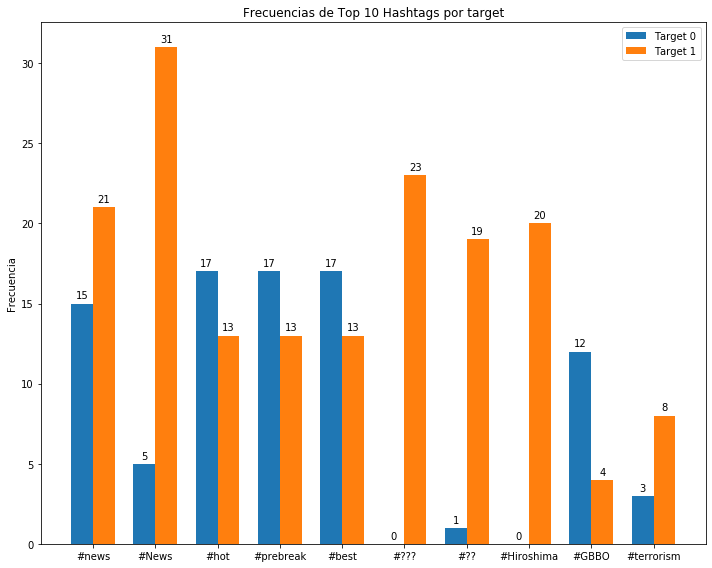

In [16]:
ancho = 0.35
x = pd.array(range(len(cant_top_10_hashtags_por_target)))
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
rects1 = ax.bar(x - ancho/2, [i[1] for i in cant_top_10_hashtags_por_target], ancho, label='Target 0')
rects2 = ax.bar(x + ancho/2, [i[2] for i in cant_top_10_hashtags_por_target], ancho, label='Target 1')

ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencias de Top 10 Hashtags por target')
ax.set_xticks(x)
ax.set_xticklabels([i[0] for i in cant_top_10_hashtags_por_target])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Viendo los resultados de los hashtags, nos damos cuenta de que la mayoría no contiene ninguno, y de los demás que si contienen, vemos que algunos tweets son puros hashtags (hasta 13 hashtags en 1 tweet). Luego, dentro de los hashtags más frecuentes vemos que algunos están completamente desbalanceados según el target, como "News" o "???" lo que puede servir a futuro para realizar predicciones.

### Menciones 

In [17]:
def contar_menciones(x):
    contador = 0
    for i in x:
        if i[0] == '@' and len(i) > 0:
            contador += 1
    return contador

df["nro_menciones_en_tweet"] = df["text"].map(contar_menciones)

In [18]:
df["nro_menciones_en_tweet"].map(lambda x: 1 if x>0 else 0).sum() #Número total de tweets con menciones

1985

In [19]:
df["nro_menciones_en_tweet"].sum() #Número total de menciones

2664

In [20]:
df["nro_menciones_en_tweet"].map(lambda x: True if x>1 else False).sum() #Cantidad de tweets con más de una mención

468

In [21]:
df["nro_menciones_en_tweet"].value_counts() #Frecuencias de las distintas cantidades de menciones por tweet

0    5628
1    1517
2     341
3      76
4      28
5      16
6       5
7       1
8       1
Name: nro_menciones_en_tweet, dtype: int64

In [22]:
df.groupby(["nro_menciones_en_tweet", "target"]).agg("count")["id"] #Frecuencias de nro. de menciones en tweet por target

nro_menciones_en_tweet  target
0                       0         3011
                        1         2617
1                       0         1016
                        1          501
2                       0          235
                        1          106
3                       0           41
                        1           35
4                       0           19
                        1            9
5                       0           13
                        1            3
6                       0            5
7                       0            1
8                       0            1
Name: id, dtype: int64

In [23]:
menciones = pd.Series()
for x in df["text"]:
    for i in x:
        if i[0] == '@':
            menciones = menciones.append(pd.Series(i))

In [24]:
top_10_menciones = Counter(menciones).most_common(10)
top_10_menciones #Top 10 menciones con frecuencias

[('@YouTube', 82),
 ('@', 27),
 ('@ArianaGrande', 11),
 ('@POTUS', 9),
 ('@Change', 9),
 ('@FoxNews', 9),
 ('@emmerdale', 8),
 ('@djicemoon', 7),
 ('@justinbieber', 7),
 ('@MikeParrActor', 6)]

In [25]:
cant_top_10_menciones_por_target = []
for x in top_10_menciones:
    cant_top_10_menciones_por_target.append([x[0], 0, 0])

In [26]:
index = 0
for x in df["text"]:
    for i in x:
        if i in [j[0] for j in top_10_menciones]:
            if df.loc[index]["target"] == 0:
                cant_top_10_menciones_por_target[[j[0] for j in top_10_menciones].index(i)][1] += 1
            else:
                cant_top_10_menciones_por_target[[j[0] for j in top_10_menciones].index(i)][2] += 1
    index += 1

In [27]:
cant_top_10_menciones_por_target #Top 10 menciones con frecuencias por target (0, 1)

[['@YouTube', 65, 17],
 ['@', 18, 9],
 ['@ArianaGrande', 11, 0],
 ['@POTUS', 3, 6],
 ['@Change', 5, 4],
 ['@FoxNews', 1, 8],
 ['@emmerdale', 7, 1],
 ['@djicemoon', 7, 0],
 ['@justinbieber', 7, 0],
 ['@MikeParrActor', 6, 0]]

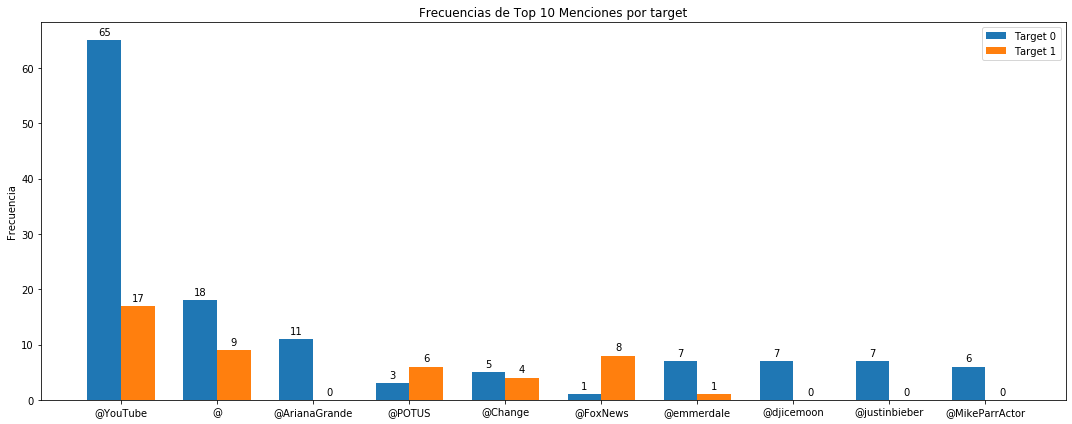

In [28]:
ancho = 0.35
x = pd.array(range(len(cant_top_10_menciones_por_target)))
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
rects1 = ax.bar(x - ancho/2, [i[1] for i in cant_top_10_menciones_por_target], ancho, label='Target 0')
rects2 = ax.bar(x + ancho/2, [i[2] for i in cant_top_10_menciones_por_target], ancho, label='Target 1')

ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencias de Top 10 Menciones por target')
ax.set_xticks(x)
ax.set_xticklabels([i[0] for i in cant_top_10_menciones_por_target])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

En las menciones vemos que la cantidad de tweets que las contienen es un poquito mayor que en los hashtags y vemos una distribución más pareja en cantidad de menciones por tweet. En cuento a las menciones más repetidas vemos que los números totales son mucho más bajos y por lo tanto las frecuencias no son tan grandes como para sacar conclusiones relevantes.